# Tabla de contenidos:

* [Imports and load datas](#Imports-and-load-datas)
* [Visualización de datos y estudio inicial](#Visualización-de-datos-y-estudio-inicial)
    * [Visualización](#Visualización)
* [Un poco más de estudio de los feature](#Un-poco-más-de-estudio-de-los-feature)

# Imports and load datas
En primer luegar se importa los módulos que se van a utilizar en este estudio. Los principales son los siguiente:
* pandas
* numpy
* sklearn
* matplotlib
* seaborn

Esta lista de imports debería ir creciendo a medida que se van realizando nuevos análisis y tratamiento de los datos. 

In [2]:
#%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

Luego se cargan los datos de la competencia

In [3]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

# Visualización de datos y estudio inicial
En esa sección haremos una visualización de los datos con los que contamos. Primero se hace una tabla que muestra los datos que están almacenados en **train**, el tipo de datos, cantidad de columnas, cantidad de datos. 

In [4]:
print('Train Dataset info')
train.head(10)

Train Dataset info


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [5]:
print('La cantidad de columnas en train es: %i y la cantidad de renglones es: %i'\
     %(len(train.columns), len(train.index)))
train.describe()

La cantidad de columnas en train es: 12 y la cantidad de renglones es: 891


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
print(train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
None


Como puede observarse hay un total de 12 columnas de las cuales 5 son datos categóricos. De los datos numéricos que se pueden ver en la tabla (de descripción) se puede deducir lo siguiente:

* PassengerId: Es el ID. Mucha información de aquí no se puede sacar.
* Survived: De estos datos se pueden observar que sobrevivieron aproximadamente 38% de la muestra.
* Pclass
* Age: Existen 714 datos. Hay 891 - 714 = 177 datos NaN
* SibSp
* Parch 
* Fare: El ticket promedio era de 32.20$(¿?)

En cuanto a los tipos de datos tenemos lo siguiente:
* int64:
    * PassengerID
    * Survived
    * Pclass
    * SibSp
    * Parch
* string:
    * Name
    * Sex
    * Ticket
    * Cabin
    * Embarked
* float64:
    * Age -> Esto debería ser int64
    * Fare

Paso siguiente veremos los datos faltantes:


In [7]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Como vemos, el dato de Cabin estamos perdiendo aproximadamente el 77%. Me parece que eso no es bueno. En cuanto a edad, tenemos casi el 20% de los datos perdidos, y el 0.22% de datos perdidos de Embarked. 

## Visualización
Lo primero es conocer el porcentaje de sobrevivientes que existen en el DataFrame

In [8]:
total = len(train.index)
sobrev = train[train['Survived'] == 1]
nosobrev = train[train['Survived'] == 0]
s = float(len(sobrev))
ns = float(len(nosobrev))
s_percent = s/total*100.0
sobre_color = 'green'
nosobre_color = 'red'

print('Sobrevivió el %.2f porciento. En el DataFrame hay un total de %i sobrevivientes y un\
 total de %i no sobrevivientes' %(s_percent, s, ns))

Sobrevivió el 38.38 porciento. En el DataFrame hay un total de 342 sobrevivientes y un total de 549 no sobrevivientes


Ahora vamos a estudiar las *features* del DataFrames, haciendo comparativas de si sobrevivió o no. 

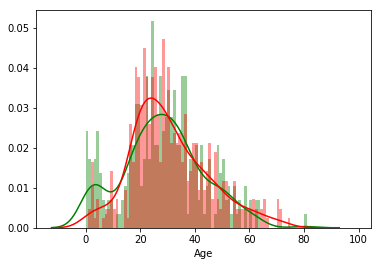

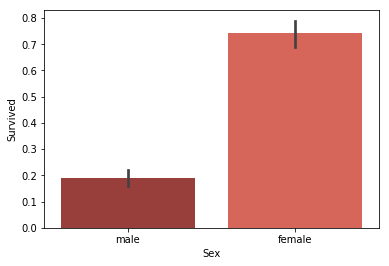

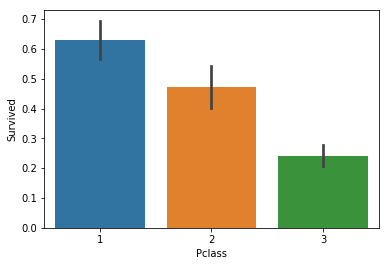

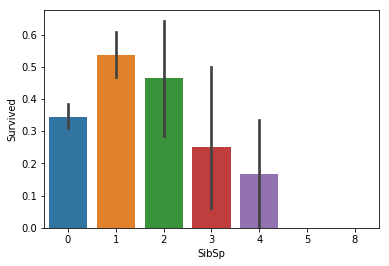

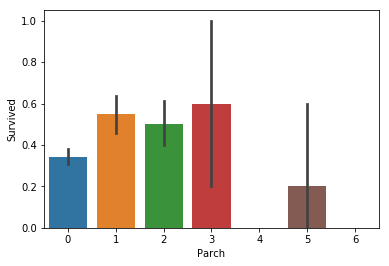

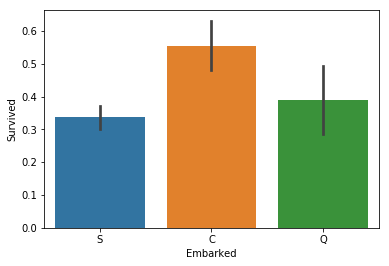

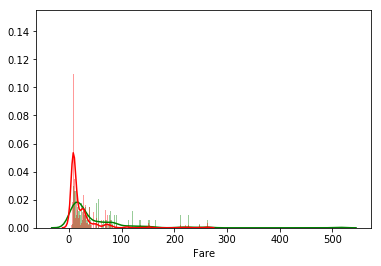

In [19]:
plt.figure()
# Estudio de la edad
sns.distplot(sobrev['Age'].dropna().values, bins=range(0, 100, 1), color=sobre_color, label='Sobrevivio')
sns.distplot(nosobrev['Age'].dropna().values, bins=range(0, 100, 1), color=nosobre_color, axlabel='Age', label='No Sobrevivio')
plt.show()
plt.figure()
# Estudio del sexo
sns.barplot('Sex', 'Survived', data=train, palette='Reds_d')
plt.show()
#Estudio de Pclass
plt.figure()
sns.barplot('Pclass','Survived', data=train)
plt.show()
# SibSp study
plt.figure()
sns.barplot('SibSp', 'Survived', data=train)
plt.show()
# Parch study
plt.figure()
sns.barplot('Parch', 'Survived', data=train)
plt.show()
# Embarked Study
plt.figure()
sns.barplot('Embarked', 'Survived', data=train)
plt.show()
# Fare study
plt.figure()
sns.distplot(sobrev['Fare'].dropna().values, bins=range(0, 513, 1), color=sobre_color, label='Sobrevivio')
sns.distplot(nosobrev['Fare'].dropna().values, bins=range(0, 513, 1), color=nosobre_color, label='No Sobrevivio', axlabel="Fare")
plt.show()

Analizando los gráficos realizados se pueden sacar algunas conclusiones. Por el lado la **edad**, se observa que la mayoría de los que iban en el Titanic eran entre 20 y 40 años. De los cuales podemos decir que, mas o menos entre los 20 y 30 la mayoría no sobrevivió. Mientras que entre los 30 y 40 había una pequeña chance mayor de sobrevivir. También se observa que, lo niños entre 0 y 10 años tenían mejor chance de sobrevivir.   

En el siguiente gráfico, se puede notar que las **mujeres** tenía una mayor chance de sobrevivir. 

Igualmente, se puede observar que las personas que viajaban en **primera clase**, fueron los que más sobrevivieron. Mientras que si viajabas en tercera clase, no tenías muchas chances de sobrevivir. 

En el tercer gráfico, también se puede observar cosas interesantes. Aquellas personas que viabajan con solos o con 1 o 2 hermanos o pareja (**SibSp**) tenían más chance de sobrevivir. A diferencia de aquellos que viabajan con 3 o 4 hermanos o parejas, pero tiene un barra de error bastante grande. Es curioso, como las personas que viajaban solos tenían menos chance de sobrevivir que las que tenían 1 o 2 SibSp. Podría darse la situación que estas personas, viajen en su mayoría en tercera clase, de ahí es su baja chance de sobrevivir en comparación a la categoría de 1 o 2 SibSP.

En el cuarto gráfico, podemos observar que aquellas peronsas que viajaban con 1,2 o 3 padres o hijos (**Parch**), tienen más chances de sobrevivir. Mientras que los que viajaban sin padres o hijos (al igual sin hermanos, es decir solos) tenían menos chances de sobrevivir. Otra cosa a destacar es que tienen bastante error los datos de Parch = 3.

También otra cosa para observar, es que las personas que tienen **Embarqued** = C tienen más chances de sobrevivir.

# Un poco más de estudio de los features
A continuación trabajaremos en la combinación entre los features. Por ejemplo, si el hecho de haber una probabilidad mayor de sobrevivir si eras mujer, se debe a que las mujeres eran jóvenes? o por el hecho de ser mujer? Igualmente sucede con los niños. Otra cosa a investigar es conocer la relación que existe entre las personas que viajaban sin heramano/pareja o hijos/padres, con su clase, o embarque.